# Store US Stock Prices in HDF5 Format

## Imports

In [34]:
import pandas as pd

## Load source data

In [35]:
data = pd.read_csv('us_stocks.csv')

## Apply required transformations

In [36]:
data['date']= pd.to_datetime(data['date'])

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15389314 entries, 0 to 15389313
Data columns (total 14 columns):
 #   Column       Dtype         
---  ------       -----         
 0   ticker       object        
 1   date         datetime64[ns]
 2   open         float64       
 3   high         float64       
 4   low          float64       
 5   close        float64       
 6   volume       float64       
 7   ex-dividend  float64       
 8   split_ratio  float64       
 9   adj_open     float64       
 10  adj_high     float64       
 11  adj_low      float64       
 12  adj_close    float64       
 13  adj_volume   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 1.6+ GB


In [38]:
mask = (data['date'] > "2000-01-01")
data = data.loc[mask]
data.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
30,A,2000-01-03,78.75,78.94,67.38,72.00,3343600.0,0.0,1.0,53.726454,53.856080,45.969377,49.121329,3343600.0
31,A,2000-01-04,68.13,68.88,64.75,66.50,3408500.0,0.0,1.0,46.481058,46.992738,44.175084,45.369006,3408500.0
32,A,2000-01-05,66.25,66.31,61.31,61.56,4119200.0,0.0,1.0,45.198445,45.239380,41.828176,41.998737,4119200.0
33,A,2000-01-06,61.63,62.00,58.13,60.00,1812900.0,0.0,1.0,42.046493,42.298923,39.658651,40.934441,1812900.0
34,A,2000-01-07,59.06,65.94,59.00,65.00,2016900.0,0.0,1.0,40.293135,44.986951,40.252200,44.345645,2016900.0


In [39]:
data = data.set_index(['ticker','date'])

In [40]:
data.head()

open   high    low  close     volume  ex-dividend  \
ticker date                                                             
A      2000-01-03  78.75  78.94  67.38  72.00  3343600.0          0.0   
       2000-01-04  68.13  68.88  64.75  66.50  3408500.0          0.0   
       2000-01-05  66.25  66.31  61.31  61.56  4119200.0          0.0   
       2000-01-06  61.63  62.00  58.13  60.00  1812900.0          0.0   
       2000-01-07  59.06  65.94  59.00  65.00  2016900.0          0.0   

                   split_ratio   adj_open   adj_high    adj_low  adj_close  \
ticker date                                                                  
A      2000-01-03          1.0  53.726454  53.856080  45.969377  49.121329   
       2000-01-04          1.0  46.481058  46.992738  44.175084  45.369006   
       2000-01-05          1.0  45.198445  45.239380  41.828176  41.998737   
       2000-01-06          1.0  42.046493  42.298923  39.658651  40.934441   
       2000-01-07          1.0  40.293135  44.986951  40.252200  44.345645   

                   adj_volume  
ticker date                    
A      2000-01-03   3343600.0  
       2000-01-04   3408500.0  
       2000-01-05   4119200.0  
       2000-01-06   1812900.0  
       2000-01-07   2016900.0

In [41]:
data = data.drop(['open', 'high', 'low', 'close', 'volume'], axis = 1)

In [42]:
data.head()

ex-dividend  split_ratio   adj_open   adj_high    adj_low  \
ticker date                                                                    
A      2000-01-03          0.0          1.0  53.726454  53.856080  45.969377   
       2000-01-04          0.0          1.0  46.481058  46.992738  44.175084   
       2000-01-05          0.0          1.0  45.198445  45.239380  41.828176   
       2000-01-06          0.0          1.0  42.046493  42.298923  39.658651   
       2000-01-07          0.0          1.0  40.293135  44.986951  40.252200   

                   adj_close  adj_volume  
ticker date                               
A      2000-01-03  49.121329   3343600.0  
       2000-01-04  45.369006   3408500.0  
       2000-01-05  41.998737   4119200.0  
       2000-01-06  40.934441   1812900.0  
       2000-01-07  44.345645   2016900.0

In [43]:
names = {
    'adj_open': 'open',
    'adj_high': 'high',
    'adj_low': 'low',
    'adj_close': 'close',
    'adj_volume': 'volume',
}
data = data.rename(columns=names)

In [44]:
data.head()

ex-dividend  split_ratio       open       high        low  \
ticker date                                                                    
A      2000-01-03          0.0          1.0  53.726454  53.856080  45.969377   
       2000-01-04          0.0          1.0  46.481058  46.992738  44.175084   
       2000-01-05          0.0          1.0  45.198445  45.239380  41.828176   
       2000-01-06          0.0          1.0  42.046493  42.298923  39.658651   
       2000-01-07          0.0          1.0  40.293135  44.986951  40.252200   

                       close     volume  
ticker date                              
A      2000-01-03  49.121329  3343600.0  
       2000-01-04  45.369006  3408500.0  
       2000-01-05  41.998737  4119200.0  
       2000-01-06  40.934441  1812900.0  
       2000-01-07  44.345645  2016900.0

## Plot data

<AxesSubplot:xlabel='ticker,date'>

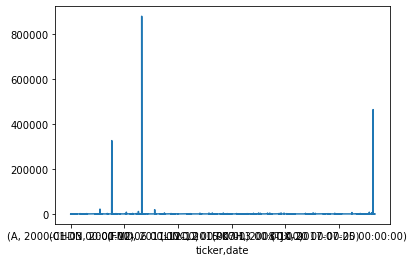

In [59]:
%matplotlib inline
data['close'].plot()

## Store in HDF5 format

In [46]:
data.to_hdf('us_stocks.h5', key='data', mode='w')